## **Collaborative Based Book Recommendation System 🧠**

- A collaborative book recommendation system is  type of software or platform that suggests books to users based on their preferences and behaviors, as well as those of similar users. The system gathers data on the user's reading habits, such as books they have read, rated, and reviewed, and uses that data to make personalized recommendations. Collaborative filtering is the most common technique used to create these recommendations, and it works by identifying patterns in the behavior of similar users and using that information to predict what books a given user might like. Users can also contribute to the system by rating and reviewing books they have read, which further improves the system's recommendations. Overall, a collaborative book recommendation system can help users discover new books that they are likely to enjoy and connect with other readers who share similar interests.

In [6]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd

In [13]:
#Loading data sets
books = pd.read_csv('Data\Books.csv')
ratings = pd.read_csv('Data\Ratings.csv')
users = pd.read_csv('Data\\Users.csv')
#This code reads data from three CSV files containing information about books, users, and book ratings.

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_24340\1488712514.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Data\Books.csv')


In [14]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Understanding The Data

- ISBN - International Standard Book Number, is a unique number that is assigned to every published book
- Book-title - Title of the book
- Book_Author - Author of the book
- Year-of-Publication - In which the particular book had published.
- publisher - by which company the book has been publoshsed.
- Image-URL-S - image url (small)
- Imgae-URL-M - image url (Medium)
- Imgae-URL-L - image url (Large)

In [15]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


- User-ID - Id of the particular user.
- Location - the location of the user(reader of the book)
- Age - Age of the user (reader of the book)

In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


- User-ID - the Id of the particular Reader
- ISBN - International Standard Book Number, is a unique number that is assigned to every published book
- Book-rating - Rating of particular book that has been ratede by the user.

In [17]:
#checking the shapes of our data sets
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


- we can clearly see that we have imbalanced data.

### **Data Cleaning 🧽**

In [18]:
#Checking whether the missing values are present in the data set or not.
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [20]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

-  Have lot of missing values in Age.

In [21]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [22]:
#Checking for duplicate values
books.duplicated().sum()

0

In [23]:
users.duplicated().sum()

0

In [24]:
ratings.duplicated().sum()

0

In [25]:
#Hurray! We Don't have any Duplicate Values

In [26]:
users['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0          NaN
1         18.0
2          NaN
3         17.0
4          NaN
          ... 
278853     NaN
278854    50.0
278855     NaN
278856     NaN
278857     NaN
Name: Age, Length: 278858, dtype: float64>

In [27]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

- There are outliers in our data, the age is 244 is not possible, and the 0 is not possible.
- We wanted to build a general model so we remove those outliers and fill the nan values with mean.

In [28]:
age_mean = users['Age'].mean()
age_std = users['Age'].std()

In [29]:
lower_bound = age_mean - 3*age_std
upper_bound = age_mean + 3*age_std

In [30]:
users = users[(users['Age'] > lower_bound) & (users['Age'] <upper_bound)].reset_index(drop=True)


In [31]:
users['Age'].describe()

count    167400.000000
mean         34.470723
std          13.651683
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          78.000000
Name: Age, dtype: float64

In [32]:
def remove_age_less_than_7(df):
    age = df['Age'] >= 7
    return df[age]
# Remove rows where Age is less than 7 using the function
users = remove_age_less_than_7(users)
users# printing the Dataframe

,User-ID,Location,Age
0,2,"stockton, california, usa",18.0
1,4,"porto, v.n.gaia, portugal",17.0
2,6,"santa monica, california, usa",61.0
3,10,"albacete, wisconsin, spain",26.0
4,11,"melbourne, victoria, australia",14.0
...,...,...,...
167395,278849,"georgetown, ontario, canada",23.0
167396,278851,"dallas, texas, usa",33.0
167397,278852,"brisbane, queensland, australia",32.0
167398,278853,"stranraer, n/a, united kingdom",17.0


In [33]:
users['Age'].describe()

count    166474.000000
mean         34.656559
std          13.459235
min           7.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          78.000000
Name: Age, dtype: float64

- Merging the Dataframes into one to perform our tasks



In [34]:
data = users.merge(ratings, on = 'User-ID')

In [35]:
data.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,10,"albacete, wisconsin, spain",26.0,1841721522,0
2,10,"albacete, wisconsin, spain",26.0,8477024456,6
3,19,"weston, ,",14.0,0375759778,7
4,20,"langhorne, pennsylvania, usa",19.0,0425163091,0


In [36]:
# Location doesn't add any value to the book recommendation, so we can remove it 
data.drop('Location', axis = 1, inplace = True)
data.head()


,User-ID,Age,ISBN,Book-Rating
0,2,18.0,0195153448,0
1,10,26.0,1841721522,0
2,10,26.0,8477024456,6
3,19,14.0,0375759778,7
4,20,19.0,0425163091,0


In [37]:
# now we want to merge the dataframe based on the ISBN to the books Dataframe.
books = books.merge(data, on = 'ISBN')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,49.0,0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,30.0,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,29.0,0


In [38]:
books.shape

(747240, 11)

In [39]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            2
User-ID                0
Age                    0
Book-Rating            0
dtype: int64

In [43]:
print('Null Values: ', books['Publisher'].isnull().sum())
print('Duplicated Values', books['Publisher'].duplicated().sum())

Null Values:  2
Duplicated Values 732810


In [54]:
books.dropna(subset=['Publisher','Book-Author','Image-URL-L'], inplace=True)


In [55]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Age                    0
Book-Rating            0
dtype: int64

In [56]:
#Now we have Cleaned Data

## **Exploratory Data Analysis (EDA) ✨**

In [57]:
#Importing Necessary Libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
Age = books['Age']
Book_Rating = books['Book-Rating']
Book_Title = books['Book-Title']
Publisher = books['Publisher']

Text(0, 0.5, 'Book Rating')

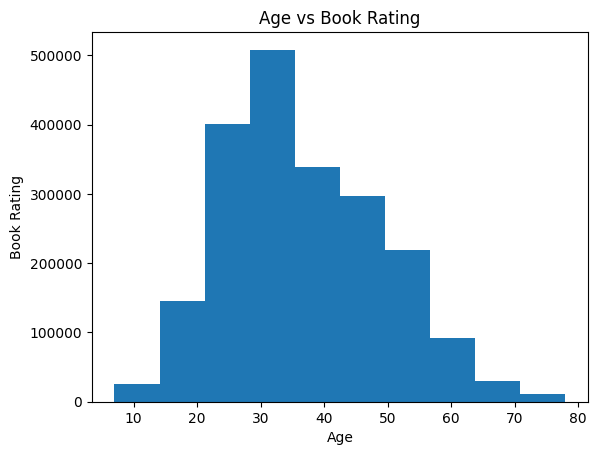

In [59]:
plt.hist(x=Age, weights=Book_Rating, bins=10, align='mid')
plt.title('Age vs Book Rating')
plt.xlabel('Age')
plt.ylabel('Book Rating')

In [60]:
# I want to find top 5 publisher has higest rating.
avg_ratings = books.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending = False)[:5]
print("These are the top 5 publishers with the highest average rating:")
for i, publisher in enumerate(avg_ratings.index, start=1):
    print(f'{i}. {publisher}: {avg_ratings[publisher]:.2f}')

These are the top 5 publishers with the highest average rating:
1.  Editions P. Terrail: 10.00
2. Unicorn Pub. House: 10.00
3. Ulmer (Eugen): 10.00
4. Ediciones Zarebska: 10.00
5. Ediciones Torremozas: 10.00


In [61]:
# I want to find the top 5 rating books.
book_ratings = books.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)[:5]

# Print the top books with their average rating
print("These are the top 5 books with the highest average rating:")
for i, book_title in enumerate(book_ratings.index, start=1):
    print(f'{i}. {book_title}: {book_ratings[book_title]:.2f}')

These are the top 5 books with the highest average rating:
1. The Mountains of California (Modern Library Classics): 10.00
2. Keane: 10.00
3. Marconi's Atlantic Leap: 10.00
4. One pot meals: 10.00
5. Baubles, Buttons and Beads: The Heritage of Bohemia: 10.00


In [62]:
# I want to fing the top 5 authors having highest rating.
Author_ratings = books.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False)[:5]

# Print the top books with their average rating
print("These are the top 5 Authors with the highest average rating:")
for i, book_Author in enumerate(Author_ratings.index, start=1):
    print(f'{i}. {book_Author}: {Author_ratings[book_Author]:.2f}')

These are the top 5 Authors with the highest average rating:
1. Lee Silber: 10.00
2. Elizabeth Zimmermann: 10.00
3. J. A. MacCulloch: 10.00
4. Elizabeth Watson: 10.00
5. Susan Washburn Buckley: 10.00


## **Popularity Based Recommender System 🫰**

In [63]:
num_rating = books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns = { 'Book-Rating' : 'num_Rating'}, inplace = True)
num_rating

,Book-Title,num_Rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Dark Justice,1
...,...,...
204143,Ã?Â?lpiraten.,1
204144,Ã?Â?rger mit Produkt X. Roman.,4
204145,Ã?Â?sterlich leben.,1
204146,Ã?Â?stlich der Berge.,3


In [64]:
# Here are gouping the two datasets on the name of the book-rating, and we are adding the mean of the rating.
avg_rating = books.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns = { 'Book-Rating' : 'Avg_Rating'}, inplace = True)
avg_rating

C:\Users\Kartik Dhiman\AppData\Local\Temp\ipykernel_24340\394894118.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating = books.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,0.000000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Dark Justice,10.000000
...,...,...
204143,Ã?Â?lpiraten.,0.000000
204144,Ã?Â?rger mit Produkt X. Roman.,5.250000
204145,Ã?Â?sterlich leben.,7.000000
204146,Ã?Â?stlich der Berge.,2.666667


In [65]:
# Merging the Data frames, on book-title
pop_df = num_rating.merge(avg_rating, on = 'Book-Title')
pop_df


,Book-Title,num_Rating,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,1,0.000000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Dark Justice,1,10.000000
...,...,...,...
204143,Ã?Â?lpiraten.,1,0.000000
204144,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
204145,Ã?Â?sterlich leben.,1,7.000000
204146,Ã?Â?stlich der Berge.,3,2.666667


In [66]:
pop_df = pop_df[pop_df['num_Rating'] >= 100].sort_values('Avg_Rating', ascending = False).head(100)
pop_df.shape

(100, 3)

In [67]:
# Merging into our Main DataFrame
data = pop_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')
data.head(2)

,Book-Title,num_Rating,Avg_Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Age,Book-Rating
0,Harry Potter and the Sorcerer's Stone (Book 1),212,6.023585,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,254,24.0,9
212,Harry Potter and the Goblet of Fire (Book 4),291,5.945017,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,254,24.0,9


In [69]:
Pop_data = data[['Book-Title','Book-Author','num_Rating','Avg_Rating']]
Pop_data.head()

,Book-Title,Book-Author,num_Rating,Avg_Rating
0,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,212,6.023585
212,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,291,5.945017
503,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,330,5.936364
833,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,290,5.724138
1123,The Little Prince,Antoine de Saint-ExupÃ©ry,103,5.631068


In [70]:
# these are the top 50 popular books
Pop_data.head(50)

,Book-Title,Book-Author,num_Rating,Avg_Rating
0,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,212,6.023585
212,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,291,5.945017
503,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,330,5.936364
833,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,290,5.724138
1123,The Little Prince,Antoine de Saint-ExupÃ©ry,103,5.631068
1226,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,171,5.362573
1397,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,421,5.130641
1818,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,272,5.022059
2090,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,110,4.927273
2200,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,208,4.865385


In [79]:
# this whole can be done in this small function.
def get_top_books(data, input_book):
    # Get the average rating of the input book
    input_rating = data.loc[data['Book-Title'] == input_book, 'Avg_Rating']
    if not input_rating.empty:
        input_rating = input_rating.iloc[0]
    else:
        # Return an error message if the input_book is not found in the dataset
        return [f"Sorry, '{input_book}' is not found in the dataset."]

    # Filter the books that have similar average rating as the input book
    filtered_books = data[(data.groupby('Book-Title')['Avg_Rating'].transform('mean') >= input_rating - 1)
                          & (data.groupby('Book-Title')['Avg_Rating'].transform('mean') <= input_rating + 1)]

    # Sort the filtered books in descending order of average rating
    sorted_books = filtered_books.sort_values('Avg_Rating', ascending=False)

    # Select the top 5 recommended books
    recommended_books = sorted_books.head(5)

    # Create a list of recommended books with their details
    books_list = []
    for i, book in recommended_books.iterrows():
        book_details = f"{book['Book-Title']} by {book['Book-Author']} with average rating {book['Avg_Rating']:.1f}"
       

        books_list.append(book_details)

    return books_list


In [80]:
input_book = input("Enter a book title: ")
recommended_books = get_top_books(data, input_book)
print(f"The 5 recommended books based on '{input_book}' are:")
for i, book in enumerate(recommended_books):
    print(f"{i+1}. {book}")
    print('----------')

The 5 recommended books based on 'Harry Potter' are:
1. Sorry, 'Harry Potter' is not found in the dataset.
----------


## **Collaborative Recommendation System 🙂**

In [81]:
books.groupby('User-ID').count()['Book-Rating']
# this is the information that particular user rates how many Books.

User-ID
2          1
10         1
19         1
20         1
36         1
          ..
278844     2
278846     1
278849     4
278851    23
278852     1
Name: Book-Rating, Length: 53362, dtype: int64

In [82]:
rate_users = books.groupby('User-ID').count()['Book-Rating'] >100
good_users = rate_users[rate_users].index

In [83]:
filtered_users = books[books['User-ID'].isin(good_users)]
filtered_users.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Age,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,29.0,0


In [84]:
rating_users = filtered_users.groupby('Book-Title').count()['Book-Rating']>30
top_books = rating_users[rating_users].index
final_ratings = filtered_users[filtered_users['Book-Title'].isin(top_books)]
final_ratings.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Age,Book-Rating
17,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,26.0,9
18,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,56.0,0


In [86]:
final_ratings.isnull().sum() 
# checking for null values

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Age                    0
Book-Rating            0
dtype: int64

In [87]:
final_ratings.duplicated().sum() 
# checking for duplicate values

0

In [88]:
pivot_table = final_ratings.pivot_table(index ='Book-Title', columns ='User-ID', values = 'Book-Rating')
pivot_table.head(4)

User-ID,254,882,1435,1733,1903,2033,2276,2358,2766,2977,...,274308,274808,275970,276463,276680,277427,277478,277639,278137,278188
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
pivot_table.fillna(0, inplace = True)

In [90]:
pivot_table.head(3)

User-ID,254,882,1435,1733,1903,2033,2276,2358,2766,2977,...,274308,274808,275970,276463,276680,277427,277478,277639,278137,278188
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
pivot_table.shape

(1509, 1279)

###### Now our each book is a vector, which means each book has 1279 values in their vectors, all are converted into vectors, and then through the help of the vectors, we find the similar vectors(books), by calculating the eucledian distance.


In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
similarity_scores = cosine_similarity(pivot_table) 
# calling them as a similarity scores


In [94]:
similarity_scores.shape

(1509, 1509)

In [95]:
# defining a function that takes book_name as a input and give the most similar books.
def recommend(book_name):
    index = np.where(pivot_table.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    for i, index in enumerate(similar_items, start=1):
        Book_title = pivot_table.index[index[0]]
        print(f"{i}. {Book_title}")
        print('--')

**Let's Test it.**

In [96]:
recommend('1984')

1. Animal Farm
--
2. Waiting
--
3. Brave New World
--
4. Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
--
5. Roll of Thunder, Hear My Cry
--


In [97]:
recommend("The Kitchen God's Wife")

1. The Bonesetter's Daughter
--
2. The Handmaid's Tale
--
3. The Hundred Secret Senses
--
4. The Joy Luck Club
--
5. The True Confessions of Charlotte Doyle (rack)
--


In [98]:

recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

1. Harry Potter and the Goblet of Fire (Book 4)
--
2. Harry Potter and the Chamber of Secrets (Book 2)
--
3. Harry Potter and the Order of the Phoenix (Book 5)
--
4. Harry Potter and the Sorcerer's Stone (Book 1)
--
5. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
--


**Future Works**
- We can deploy it using Heroku and flask
